In [0]:
import torch

In [2]:
torch.__version__

'1.3.0+cu100'

In [0]:
x_data = torch.tensor([[2.0], [3.0],[4.0], [5.0], [8.0], [9.0], [11.0]])
y_data = torch.tensor([[0.0],[0.0], [0.0], [0.0], [1.0], [1.0], [1.0] ])

In [0]:
import torch.nn as nn
import matplotlib.pyplot as plt

In [0]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1,1)
    def forward(self,x):
        y_pred = torch.sigmoid(self.l1(x))
        return y_pred

In [0]:
#nn.Module??

In [0]:
model = LogisticRegression()

In [25]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.9236]], requires_grad=True), Parameter containing:
 tensor([0.3361], requires_grad=True)]

In [26]:
model.forward(torch.tensor([[22.0]]))

tensor([[2.0968e-09]], grad_fn=<SigmoidBackward>)

# Data and Model are ready now


#### Next Steps
#### Optimizer
### Loss function 
### Training

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.BCELoss()

In [22]:
loss_list = []
for epoch in range(1, 50):
    print(f"Epoch: {epoch}")
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    loss.backward()
    print(f"Loss: {loss.item()}")
    optimizer.step()
    optimizer.zero_grad()
    loss_list.append(loss.item())

Epoch: 1
Loss: 1.610506296157837
Epoch: 2
Loss: 1.5732535123825073
Epoch: 3
Loss: 1.5363138914108276
Epoch: 4
Loss: 1.4997003078460693
Epoch: 5
Loss: 1.463431477546692
Epoch: 6
Loss: 1.4275230169296265
Epoch: 7
Loss: 1.3919941186904907
Epoch: 8
Loss: 1.3568620681762695
Epoch: 9
Loss: 1.3221467733383179
Epoch: 10
Loss: 1.2878682613372803
Epoch: 11
Loss: 1.2540473937988281
Epoch: 12
Loss: 1.2207049131393433
Epoch: 13
Loss: 1.187864065170288
Epoch: 14
Loss: 1.155547022819519
Epoch: 15
Loss: 1.123778223991394
Epoch: 16
Loss: 1.0925817489624023
Epoch: 17
Loss: 1.06198251247406
Epoch: 18
Loss: 1.032006025314331
Epoch: 19
Loss: 1.0026789903640747
Epoch: 20
Loss: 0.9740274548530579
Epoch: 21
Loss: 0.9460787177085876
Epoch: 22
Loss: 0.9188593626022339
Epoch: 23
Loss: 0.8923969268798828
Epoch: 24
Loss: 0.8667182326316833
Epoch: 25
Loss: 0.8418501019477844
Epoch: 26
Loss: 0.8178184628486633
Epoch: 27
Loss: 0.794648289680481
Epoch: 28
Loss: 0.772363543510437
Epoch: 29
Loss: 0.7509864568710327
Epoc

In [23]:
model.forward(torch.tensor([[22.0]]))

tensor([[0.9953]], grad_fn=<SigmoidBackward>)

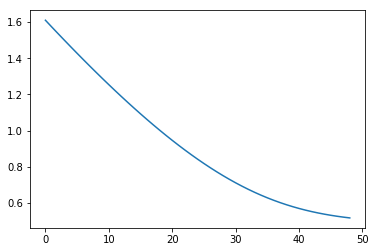

In [27]:
plt.plot(loss_list)

In [28]:
import os
os.listdir()

['.config', 'diabetes.csv.gz', 'sample_data']

In [0]:
import pandas as pd
import numpy as np

In [0]:
db = pd.read_csv('diabetes.csv.gz',compression='gzip', header = None, dtype = np.float32)

In [39]:
db.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0.0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1.0
2,-0.058823,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0.0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1.0
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0.0


In [0]:
X = db.iloc[:, :-1].values
y = db.iloc[:,-1].values

In [0]:
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [0]:
class DeepModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(8,20)
        self.l2 = nn.Linear(20,30)
        self.l3 = nn.Linear(30,1)
    def forward(self,x):
        x = torch.relu(self.l1(x))
        x = torch.relu(self.l2(x))
        y_pred = torch.sigmoid(self.l3(x))
        return y_pred


In [0]:
model = DeepModel()


In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.BCELoss()

In [66]:
model

DeepModel(
  (l1): Linear(in_features=8, out_features=20, bias=True)
  (l2): Linear(in_features=20, out_features=30, bias=True)
  (l3): Linear(in_features=30, out_features=1, bias=True)
)

In [67]:
loss_list = []
for epoch in range(1, 50):
    print(f"Epoch: {epoch}")
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    loss.backward()
    print(f"Loss: {loss.item()}")
    optimizer.step()
    optimizer.zero_grad()
    loss_list.append(loss.item())

Epoch: 1
Loss: 0.7117507457733154
Epoch: 2
Loss: 0.7010685205459595
Epoch: 3
Loss: 0.6913071870803833
Epoch: 4
Loss: 0.6816766262054443
Epoch: 5
Loss: 0.671356737613678
Epoch: 6
Loss: 0.660825252532959
Epoch: 7
Loss: 0.6499667763710022
Epoch: 8
Loss: 0.638731837272644
Epoch: 9
Loss: 0.6272495985031128
Epoch: 10
Loss: 0.6159362196922302
Epoch: 11
Loss: 0.6052073240280151
Epoch: 12
Loss: 0.5952610969543457
Epoch: 13
Loss: 0.5859678387641907
Epoch: 14
Loss: 0.5765304565429688
Epoch: 15
Loss: 0.5658605098724365
Epoch: 16
Loss: 0.5534254908561707
Epoch: 17
Loss: 0.5399613976478577
Epoch: 18
Loss: 0.5271031260490417
Epoch: 19
Loss: 0.5162779092788696
Epoch: 20
Loss: 0.5064313411712646
Epoch: 21
Loss: 0.49572187662124634
Epoch: 22
Loss: 0.48502808809280396
Epoch: 23
Loss: 0.477120578289032
Epoch: 24
Loss: 0.47251009941101074
Epoch: 25
Loss: 0.46842071413993835
Epoch: 26
Loss: 0.46477651596069336
Epoch: 27
Loss: 0.46386051177978516
Epoch: 28
Loss: 0.4644220173358917
Epoch: 29
Loss: 0.463748484

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([759])) that is different to the input size (torch.Size([759, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
